<a href="https://colab.research.google.com/github/kushagra1102/yolov5/blob/main/MMDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github//pylabel-project/samples/blob/main/yolo2coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

# 1. Convert Yolo V5 Annotations (TXT Files) to COCO JSON Format
Converting from yolo to another format is a little tricky because yolo format does not store the dimensions of the image, which you will need to convert to most other formats. So you need to read the image file to get the height and width of the image. The PyLabel package takes care of that. This notebook will show how you can import yolo v5 annotations and export them into another format, like COCO.



In [ ]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null

In [ ]:
from pylabel import importer

## Import Yolo annotations 
First we will import annotations stored in Yolo v5 format. (This is a sample data data set. You can edit this part to point to your dataset.)


In [ ]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nguyngiabol/colorful-fashion-dataset-for-object-detection

 85% 89.0M/104M [00:01<00:00, 68.7MB/s]
100% 104M/104M [00:01<00:00, 70.3MB/s] 


In [ ]:
! unzip colorful-fashion-dataset-for-object-detection

In [ ]:
!rm /content/dataset/labels/classes.txt

There are two methods of importing YOLOv5 annotations. The method shown here 'ImportYoloV5' will read the annotations but you must also provide a list of the class names that map to the class ids. There is another method, 'ImportYoloV5WithYaml' that can read the class names from a YAML file, shown in this notebook: [yolo_with_yaml_importer.ipynb](https://github.com/pylabel-project/samples/blob/main/yolo_with_yaml_importer.ipynb)

In [ ]:
path_to_annotations = "/content/dataset/labels"

#Identify the path to get from the annotations to the images 
path_to_images = "/content/dataset/images"

#Import the dataset into the pylable schema 
#Class names are defined here https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml
yoloclasses = ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
dataset = importer.ImportYoloV5(path=path_to_annotations, path_to_images=path_to_images, cat_names=yoloclasses,
    img_ext="jpg", name="dataset")

dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/content/dataset/images,149188.jpg,,0,400,600,3,,136.0,395.9997,...,,,,,,8,bag,,,1
1,/content/dataset/images,149188.jpg,,0,400,600,3,,133.0,138.9999,...,,,,,,3,shirt,,,1
2,/content/dataset/images,149188.jpg,,0,400,600,3,,186.0,573.9999,...,,,,,,4,pants,,,1
3,/content/dataset/images,149188.jpg,,0,400,600,3,,221.0,547.9998,...,,,,,,9,shoe,,,1
4,/content/dataset/images,149188.jpg,,0,400,600,3,,153.0,290.9997,...,,,,,,6,skirt,,,1


## Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [ ]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 2682
Number of classes: 10
Classes:['sunglass', 'hat', 'jacket', 'shirt', 'pants', 'shorts', 'skirt', 'dress', 'bag', 'shoe']
Class counts:
shoe        2601
shirt       1852
bag         1462
jacket       958
skirt        883
dress        678
pants        622
shorts       502
sunglass     425
hat          350
Name: cat_name, dtype: int64


## Edit Annotations 
All of the annotations are stored in a Pandas dataframe that you can access directly as 'dataset.df'. Not only can you do your own custom queries of the dataset, but you can also manipulate the dataset by removing rows, changing labels, etc.  

PyLabel also includes a lightweight annotation tool that you can use to create and edit bounding box annotations within a Jupyter notebook. You can see an example of that tool here: [pylabeler.ipynb](https://github.com/pylabel-project/samples/blob/main/pylabeler.ipynb)

## Visualize Annotations 
You can render the bounding boxes for your image to inspect them and confirm that they imported correctly.  

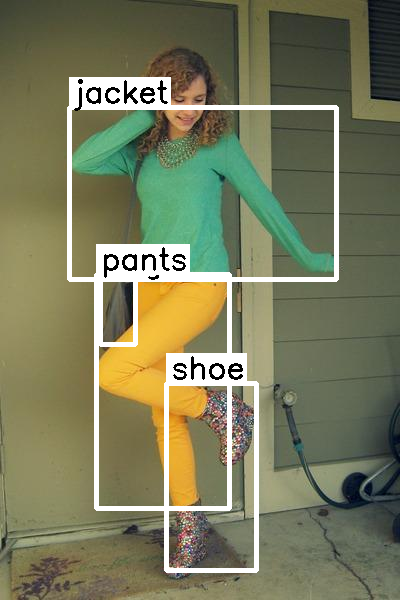

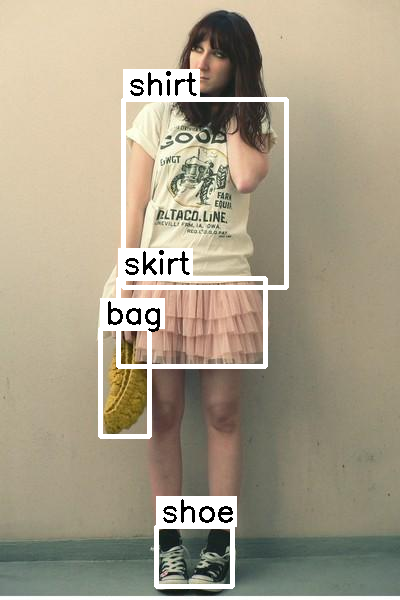

In [ ]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(100))
display(dataset.visualize.ShowBoundingBoxes(30))


**Export to Coco Json**

The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
All annotations will be stored in a single json file. 

In [ ]:
dataset.export.ExportToCoco(cat_id_index=1)

['/content/dataset/labels/dataset.json']

In [ ]:
files.download('/content/dataset/labels/dataset.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Install MMDetection

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [1]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.2 MB/s eta 0:16:36tcmalloc: large alloc 1147494400 bytes == 0x38fb0000 @  0x7f9d9b7c4615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌               | 1055.7 MB 1.4 MB/s eta 0:11:45tcmalloc: large alloc 1434370048 bytes == 0x7d606000 @  0x7f9d9b7c4615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████

In [2]:
from mmcv import collect_env
collect_env()

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


{'CUDA available': False,
 'GCC': 'x86_64-linux-gnu-gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0',
 'MMCV': '1.5.3',
 'MMCV CUDA Compiler': '11.1',
 'MMCV Compiler': 'GCC 7.3',
 'OpenCV': '4.1.2',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=11.1, CUDNN_VERSION=8.0.5, CXX_COMPILER=/opt/rh/devtoolset-7/root/usr/bin/c++, CXX_FLAGS= -Wno-deprecated -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -fopenmp -DNDEBUG -DUSE_KINETO -DUSE_FBGEMM -DUSE_QNNPACK -DUSE_PYTORCH_QNNPACK -DUSE_XNNPACK -DSYMBOLICATE_MOBILE_DEBUG_HANDLE -O2 -fPIC -Wno-narrowing -Wall -Wextra -Werror=retur

In [3]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 False
2.25.0
11.1
GCC 7.3


In [4]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth \
      -O checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth


--2022-07-01 14:48:41--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167291982 (160M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth’

checkpoints/faster_ 100%[===================>] 159.54M  7.79MB/s    in 18s     

2022-07-01 14:49:00 (8.72 MB/s) - ‘checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth’ saved [167291982/167291982]

